In [1]:
from nsaba.nsaba import Nsaba
from nsaba.nsaba import analysis
from nsaba.nsaba import geneinfo
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/simonhaxby/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data_dir = "../../data_dir"

In [3]:
# loading class DataFrames
Nsaba.aba_load(data_dir)
Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [4]:
df = geneinfo.load_gene_file("../../")

In [5]:
# Intializing instance and loading gene expression
tsaba = Nsaba()
tsaba.load_ge_pickle(path=data_dir)

'ge' dictionary successfully loaded


In [6]:
term = 'reward'
tsaba.is_term(term)

True

In [7]:
tsaba.estimate_aba_ge([6531])

In [21]:
analy = analysis.NsabaAnalysis(tsaba)

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled


In [94]:
%%time
tsaba.estimate_ns_act(term, rnn_args={"radius":8})

CPU times: user 1.9 s, sys: 178 ms, total: 2.08 s
Wall time: 2.08 s


t-value: -6.4064 
p-value: 2.410E-10
Effect size: -0.7142
Control/Functional Split: 803/90



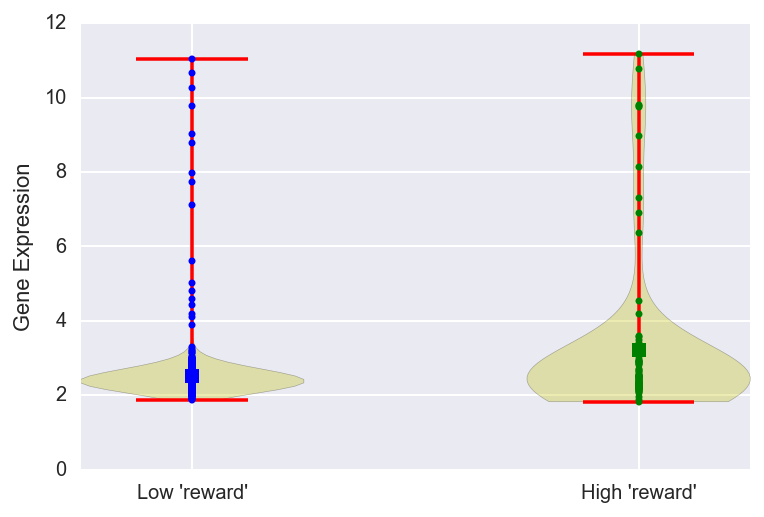

In [101]:
analy.term_ge_ttest(term, 6531, split_method='quant', graphops='violin', quant=90)

In [96]:
ttest_metr = analy.term_ge_ttest_multi(term, quant=90)

This may take a couple of minutes ...


In [97]:
fetch = False
if fetch:
    eids = geneinfo.fetch_entrez_ids("reward", 5)
    eids = [int(eid) for eid in eids]

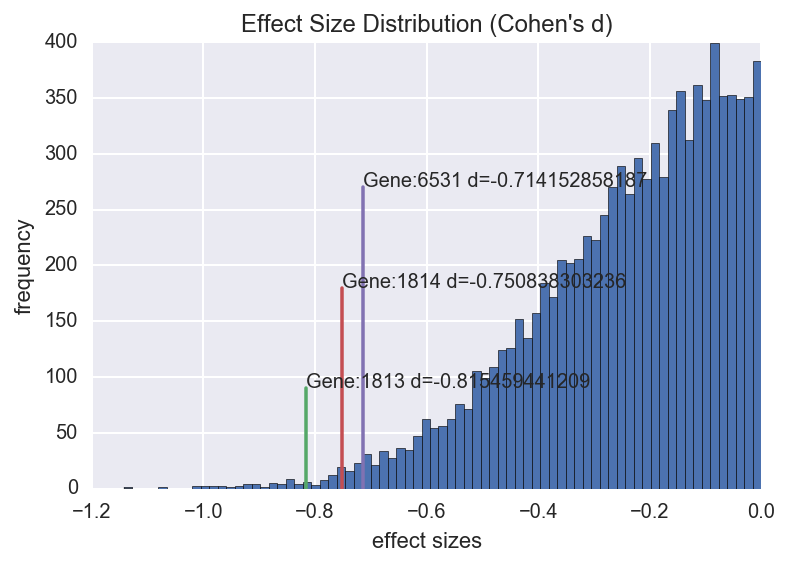

In [98]:
analy.cohen_d_distr(ttest_metr, genes_of_interest=eids)

Percent Significant (Bonferroni Correction; alpha = .05): 3.329 %


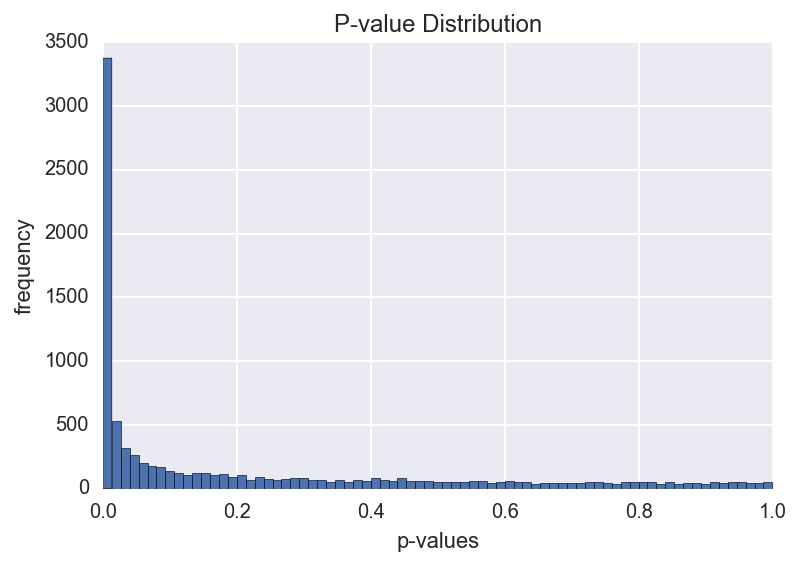

In [99]:
analy.p_val_distr(ttest_metr)

In [64]:
analy.fetch_gene_descriptions(ttest_metr, csv_path="../../", nih_fetch_num=35)

Gene 23620 not found in NIH database
Gene 128414 not found in NIH database
Gene 56886 not found in NIH database
Gene 25890 not found in NIH database
Gene 140828 not found in NIH database
Gene 400618 not found in NIH database
Gene 353134 not found in NIH database
Gene 55086 not found in NIH database
Gene 23118 not found in NIH database
Gene 27233 not found in NIH database
Gene 374467 not found in NIH database
Gene 326340 not found in NIH database
Gene 157506 not found in NIH database
Gene 150378 not found in NIH database

Corrected Bonferroni Alpha: 2.405E-06


5836 (p = 4.495E-21; d = -1.076): [u'This gene encodes a homodimeric protein that catalyses the cleavage of alpha-1,4-glucosidic bonds to release glucose-1-phosphate from liver glycogen stores. This protein switches from inactive phosphorylase B to active phosphorylase A by phosphorylation of serine residue 15. Activity of this enzyme is further regulated by multiple allosteric effectors and hormonal controls. Humans have three g

[(5836,
  -1.0764424707511628,
  4.4951685072603371e-21,
  'phosphorylase, glycogen, liver',
  "[u'This gene encodes a homodimeric protein that catalyses the cleavage of alpha-1,4-glucosidic bonds to release glucose-1-phosphate from liver glycogen stores. This protein switches from inactive phosphorylase B to active phosphorylase A by phosphorylation of serine residue 15. Activity of this enzyme is further regulated by multiple allosteric effectors and hormonal controls. Humans have three glycogen phosphorylase genes that encode distinct isozymes that are primarily expressed in liver, brain and muscle, respectively. The liver isozyme serves the glycemic demands of the body in general while the brain and muscle isozymes supply just those tissues. In glycogen storage disease type VI, also known as Hers disease, mutations in liver glycogen phosphorylase inhibit the conversion of glycogen to glucose and results in moderate hypoglycemia, mild ketosis, growth retardation and hepatomegaly. Al

In [ ]:
r_vals = analy.term_ge_spearman_rho(term)

In [ ]:
analy.rho_distr(r_vals, genes_of_interest=eids)

In [ ]:
analy.fetch_gene_descriptions(r_vals, coeff='spearman', csv_path="../..")